<a href="https://colab.research.google.com/github/kshitj79/Code-Claus-ToDo-list/blob/main/CodeClauseInternship_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
import missingno as msno

<Axes: >

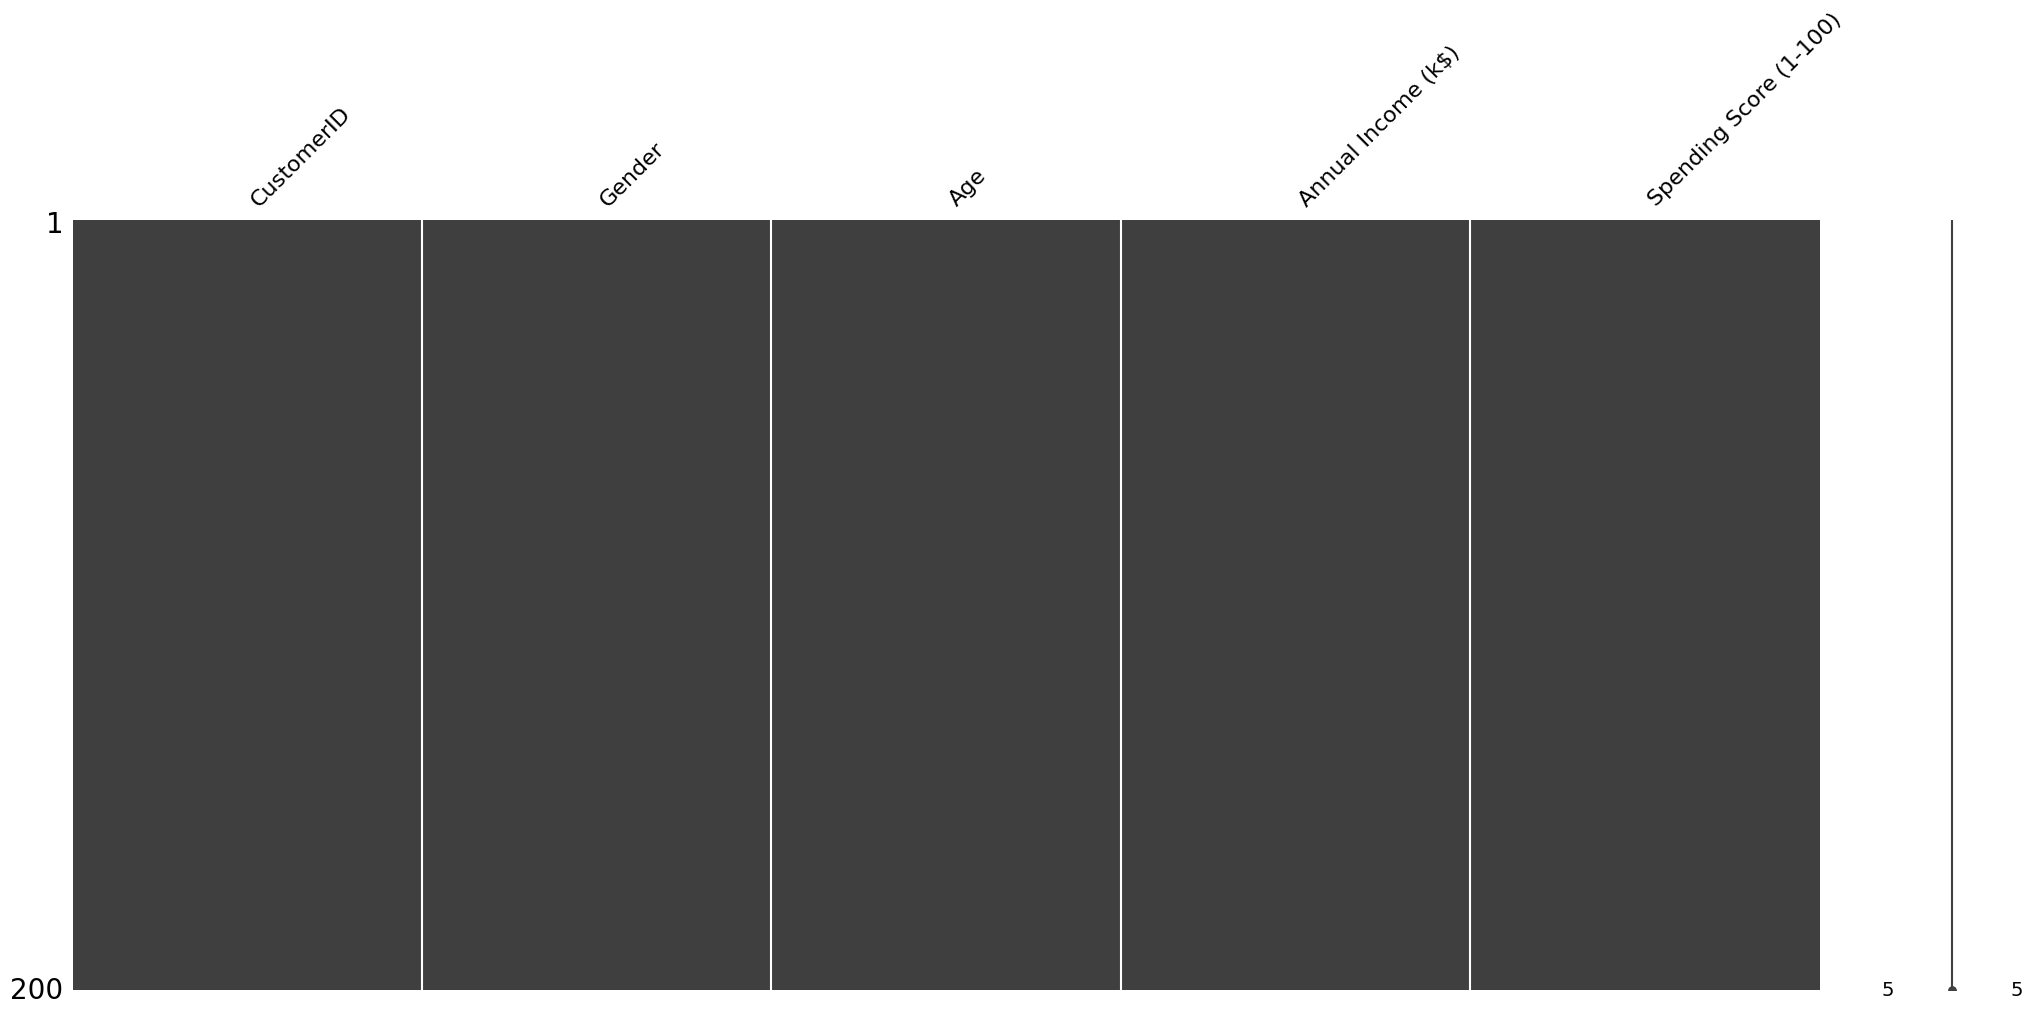

In [8]:
msno.matrix(data)

In [9]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<ipython-input-10-0c9e9f16ce47>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
<ipython-input-10-0c9e9f16ce47>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])
<ipython-input-10-0c9e9f16ce47>:16: UserWarning: 

`distplot` is a deprecated function and w

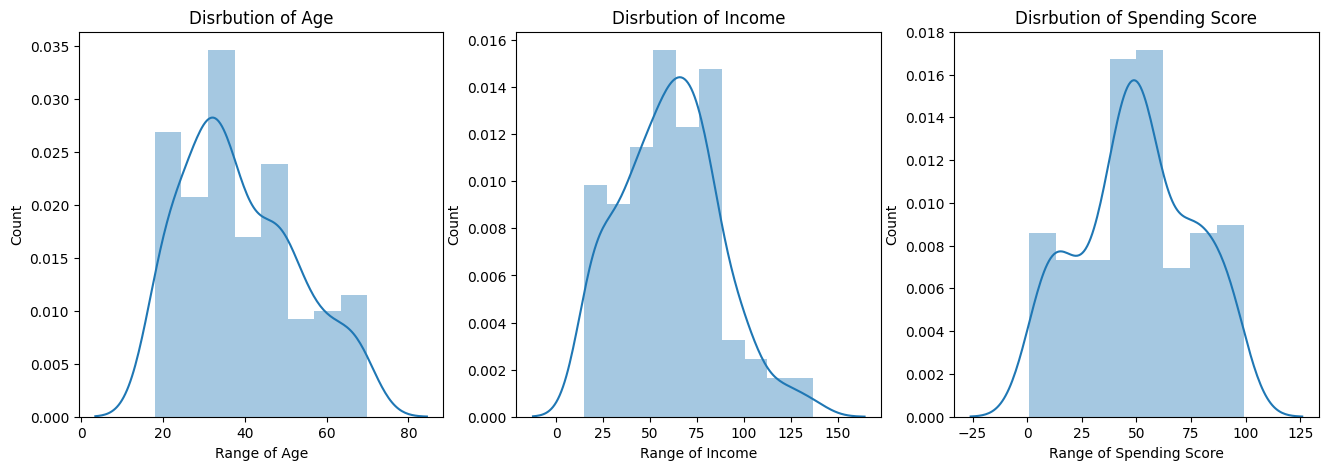

In [10]:
plt.figure(figsize = (16,5))

plt.subplot(1, 3, 1)
sns.distplot(data['Age'])
plt.title("Disrbution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1, 3,2)
sns.distplot(data['Annual Income (k$)'])
plt.title("Disrbution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.distplot(data['Spending Score (1-100)'])
plt.title("Disrbution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")
plt.show()

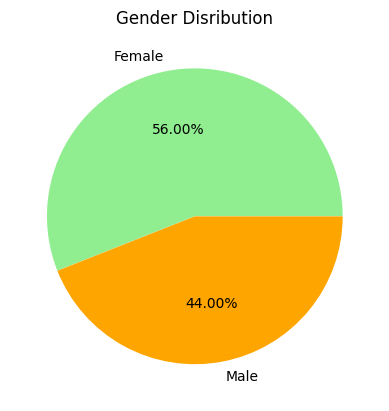

In [11]:
df = data.groupby('Gender').size()

df.plot(kind='pie', subplots = True,
       colors = ['lightgreen', 'orange'],
       explode = [0, 0.001],
       labels = ['Female', 'Male'],
       autopct = '%.2f%%' )
plt.title("Gender Disribution")
plt.ylabel("")
plt.show()

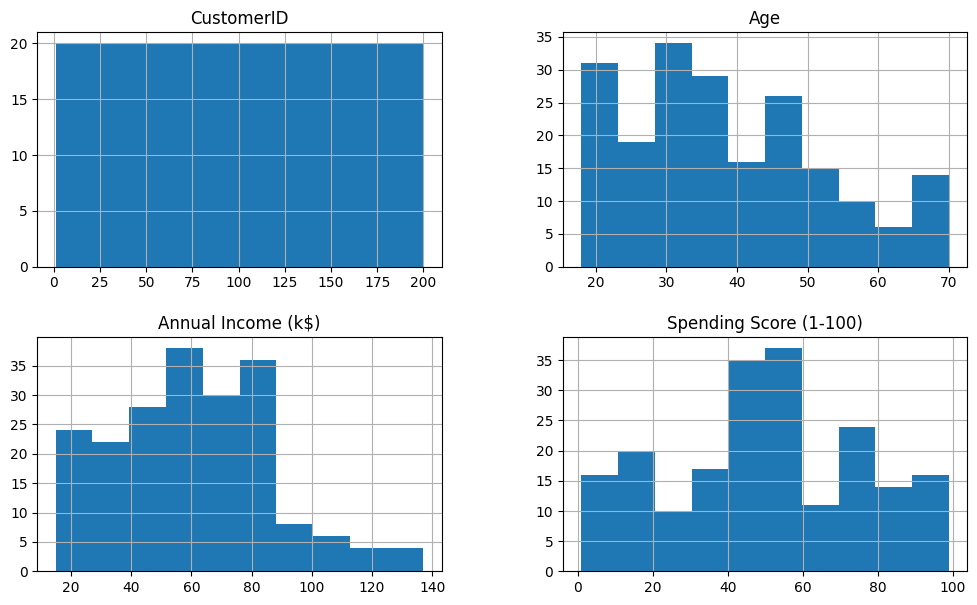

In [12]:
data.hist(figsize = (12, 7))
plt.show()

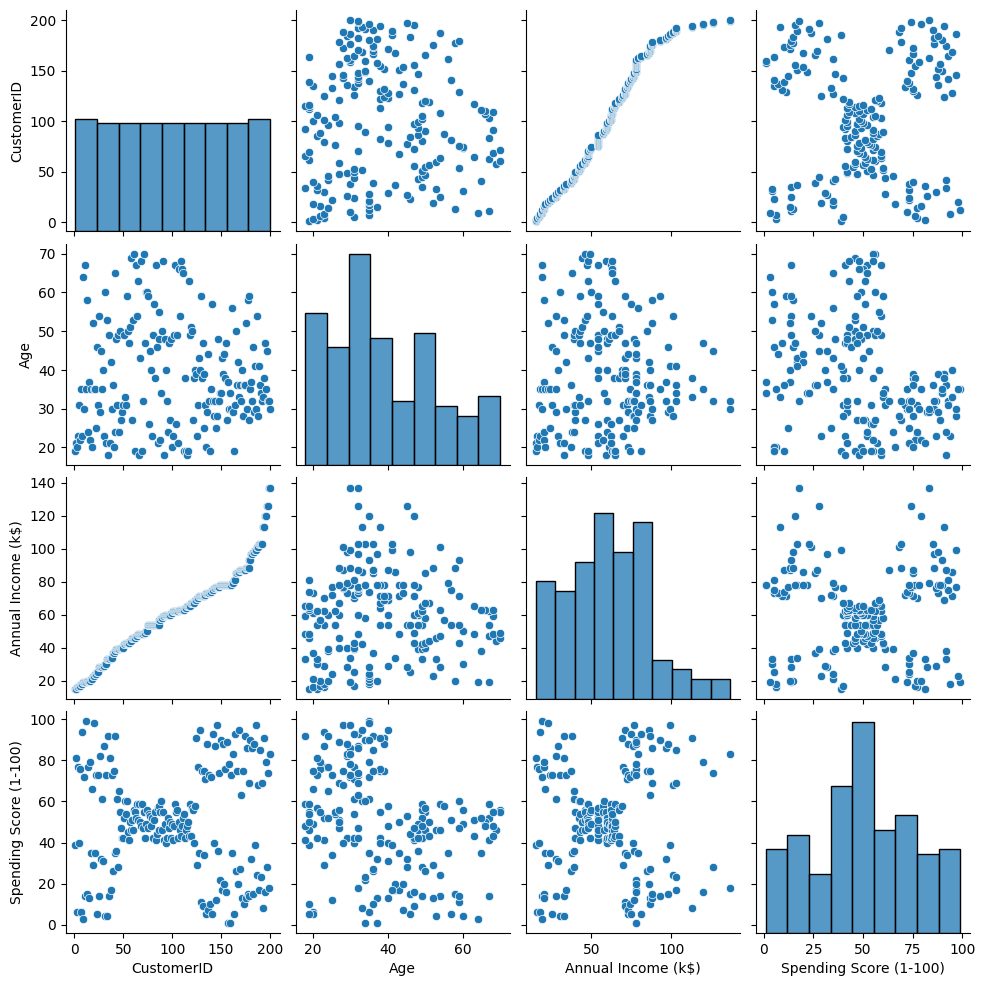

In [13]:
sns.pairplot(data)
plt.show()

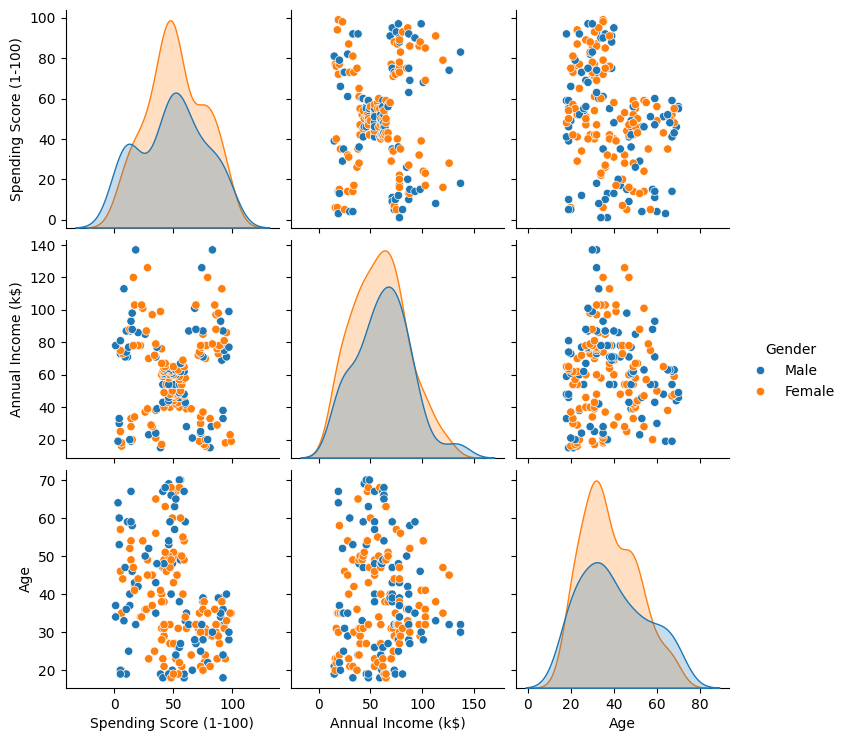

In [14]:
sns.pairplot(data, vars = ['Spending Score (1-100)','Annual Income (k$)', 'Age'], hue = 'Gender')

Text(0.5, 1.0, 'Distribnution of Age')

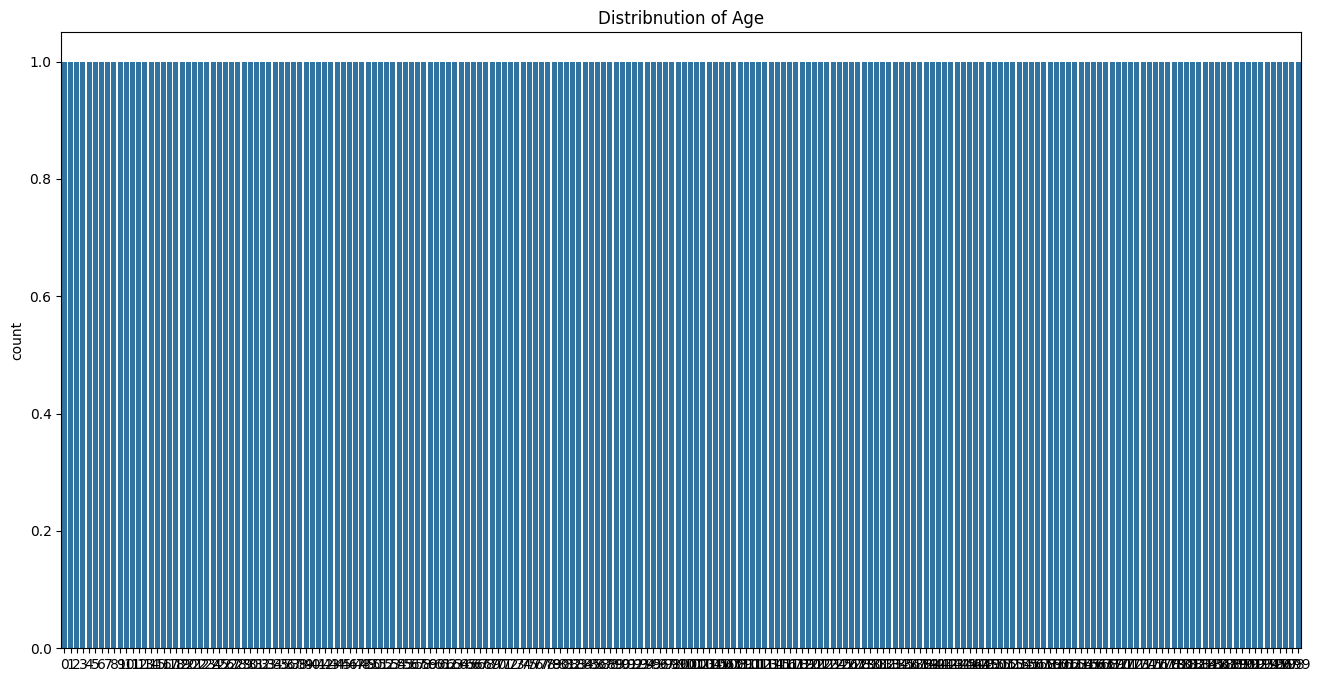

In [15]:
plt.figure(figsize = (16,8))
sns.countplot(data['Age'])
plt.title("Distribnution of Age")

Text(0.5, 1.0, 'Distribnution of Annual Income (k$)')

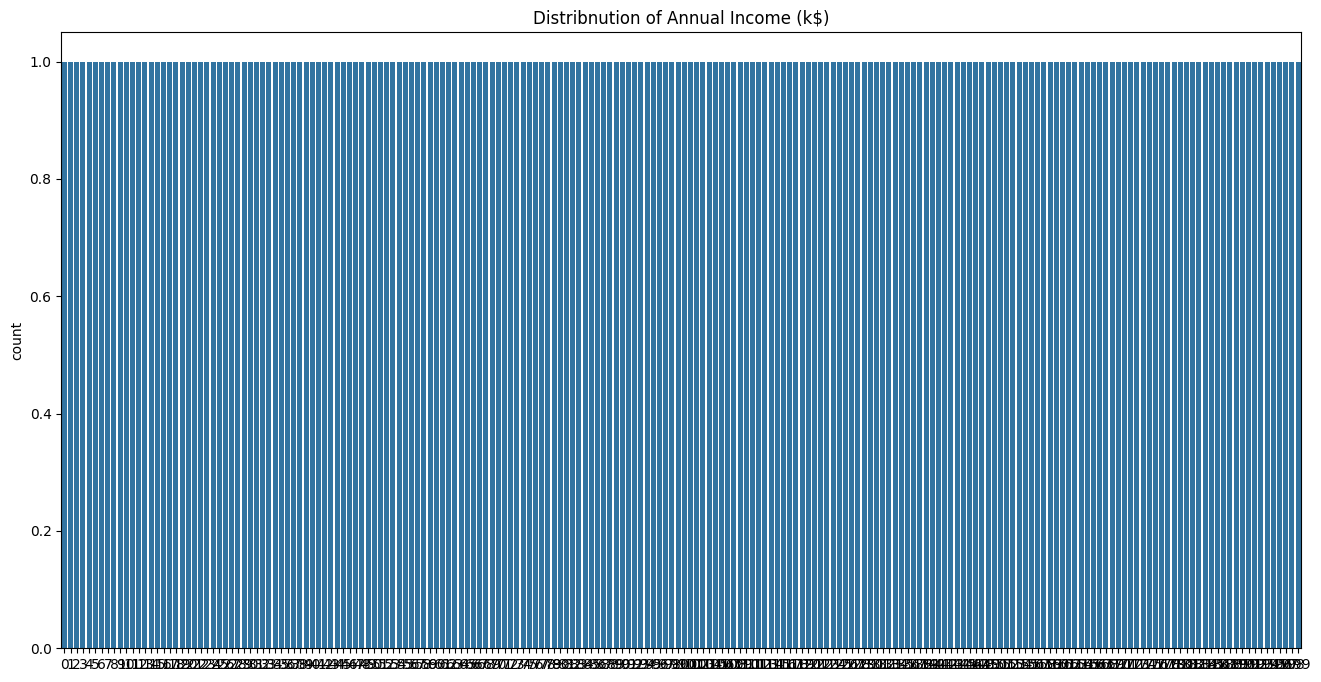

In [16]:
plt.figure(figsize = (16,8))
sns.countplot(data['Annual Income (k$)'])
plt.title("Distribnution of Annual Income (k$)")

Text(0.5, 1.0, 'Distribnution of Spending Score (1-100)')

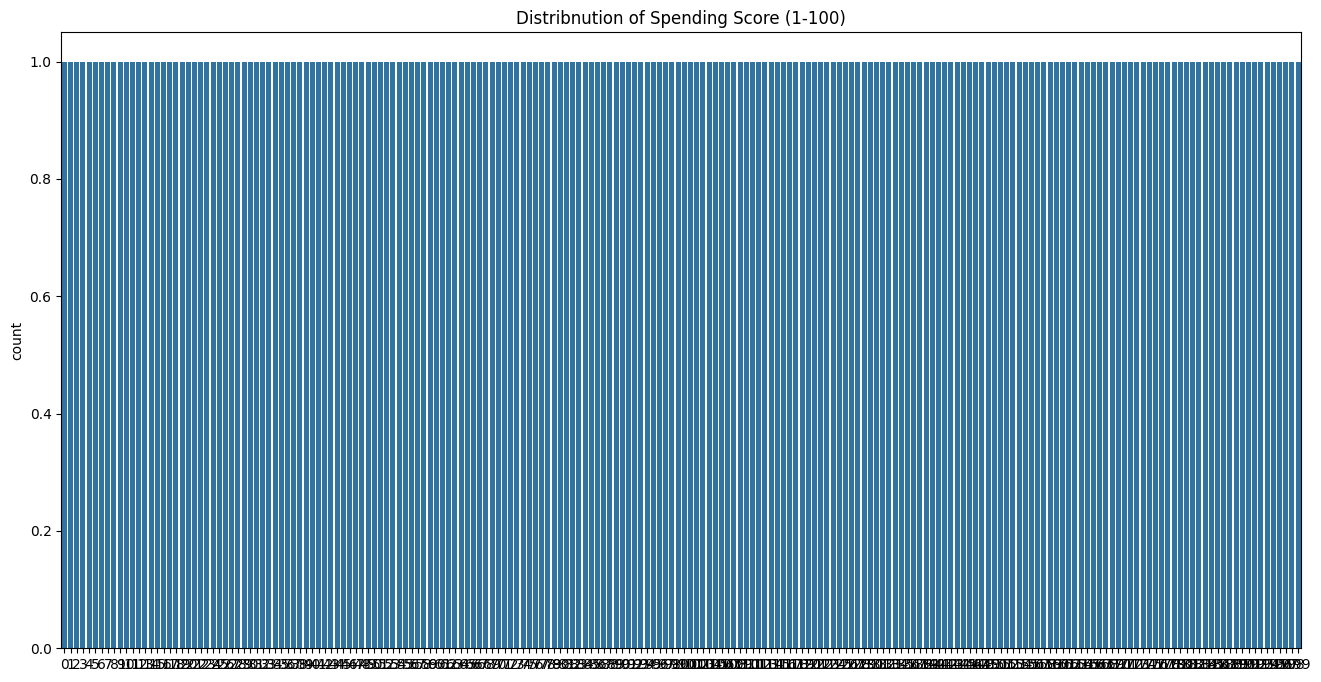

In [17]:
plt.figure(figsize = (16,8))
sns.countplot(data['Spending Score (1-100)'])
plt.title("Distribnution of Spending Score (1-100)")

In [18]:
!pip install dabl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 9.9 MB/s eta 0:00:00


In [19]:
import dabl

Target looks like regression


/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.24E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

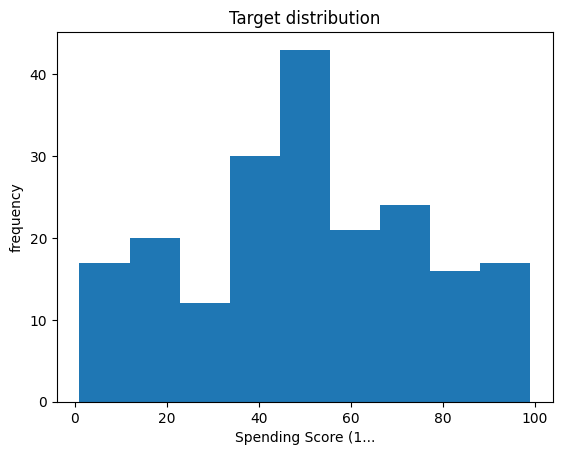

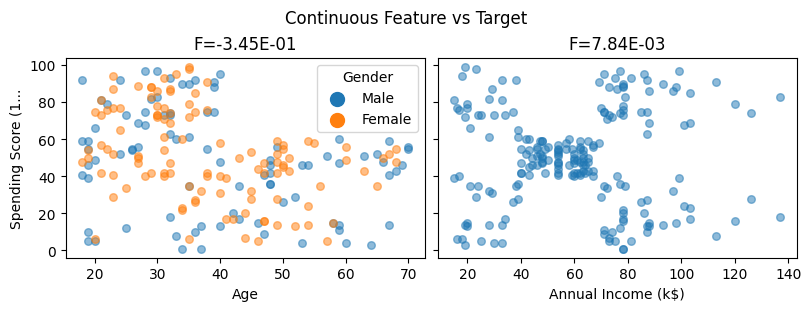

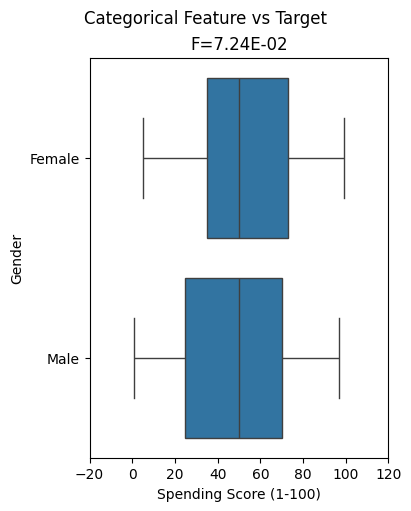

In [20]:
dabl.plot(data, target_col = 'Spending Score (1-100)')


Target looks like regression


/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.66E-03'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

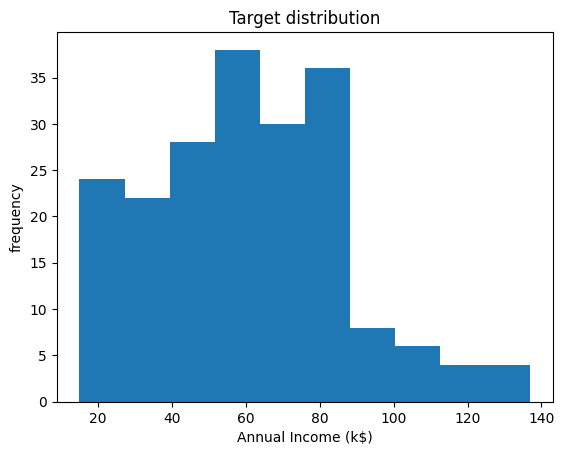

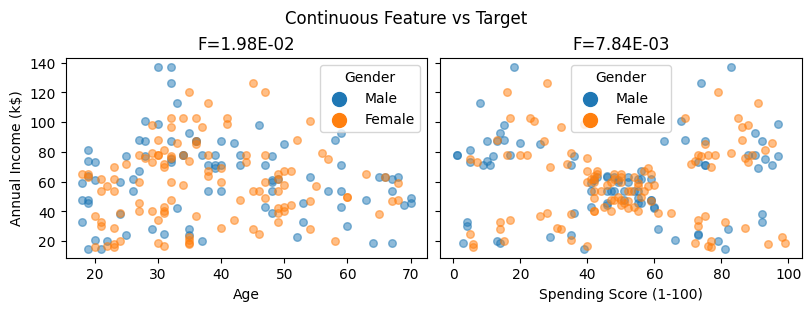

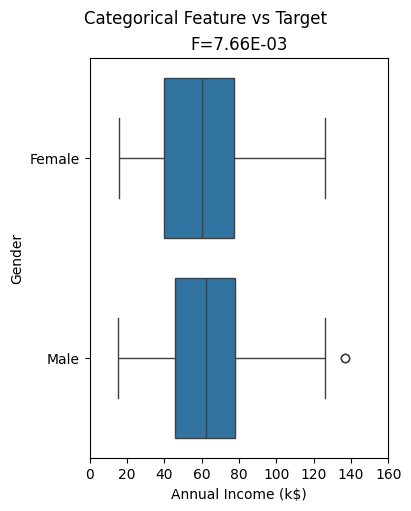

In [21]:
dabl.plot(data, target_col = 'Annual Income (k$)')

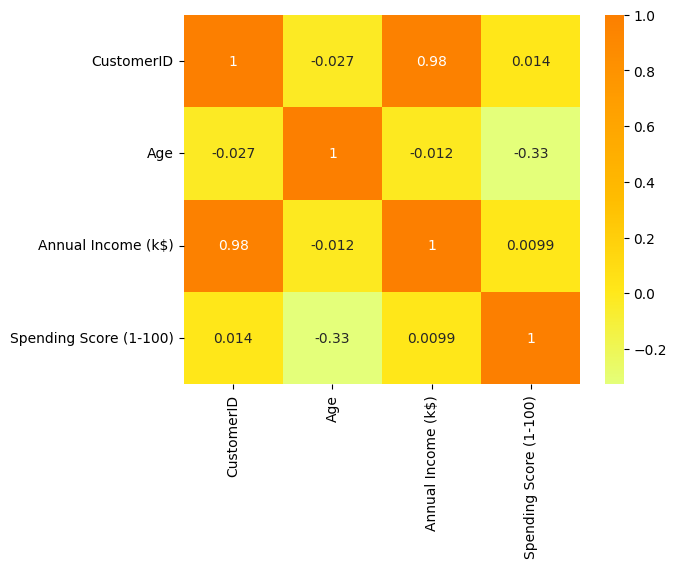

In [22]:
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), cmap='Wistia', annot=True)
plt.show()

In [23]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

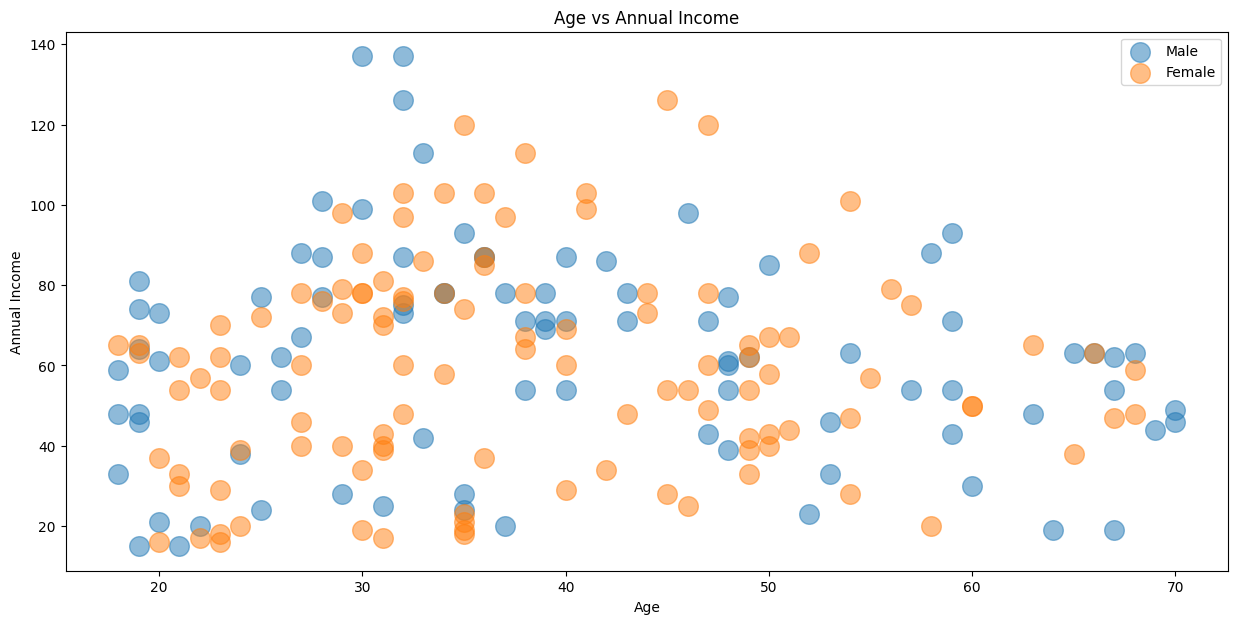

In [24]:
plt.figure(figsize = (15, 7))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)',
               data = data[data['Gender'] == gender],
               s = 200, alpha = 0.5,
               label = gender)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age vs Annual Income")
plt.legend()
plt.show()

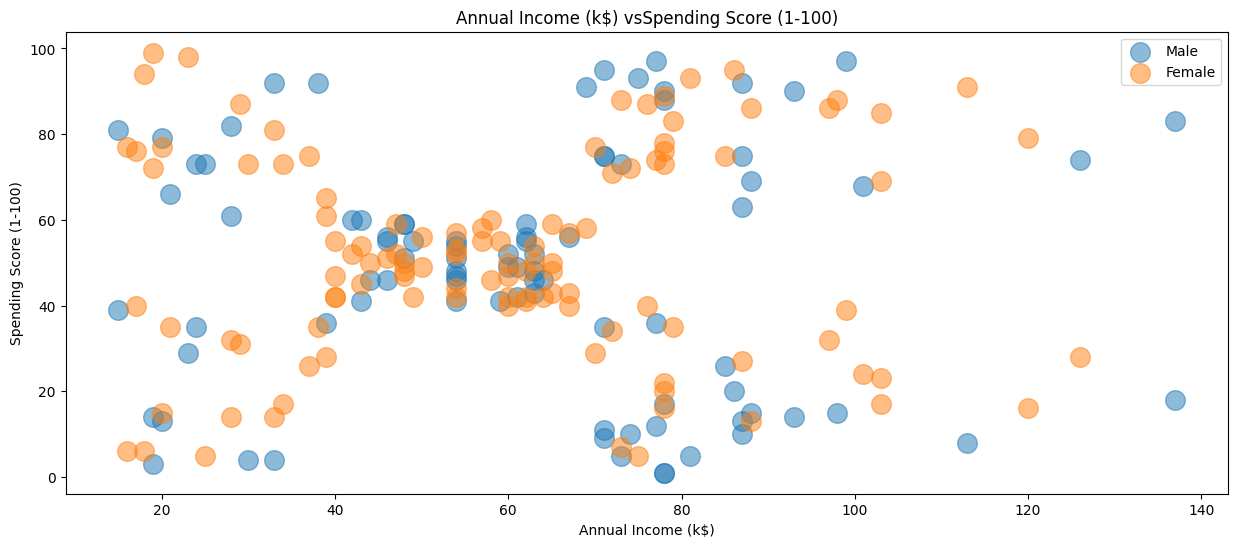

In [25]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vsSpending Score (1-100)')
plt.legend()
plt.show()

In [26]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [28]:
x = data.iloc[:, [3,4]].values
x


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [29]:
from sklearn.cluster import KMeans

In [30]:
k = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

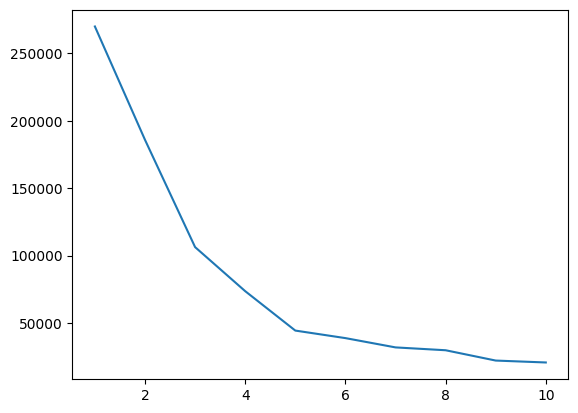

In [31]:
plt.plot(range(1, 11), k)
plt.show()

In [32]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kemsn = model.fit_predict(x)

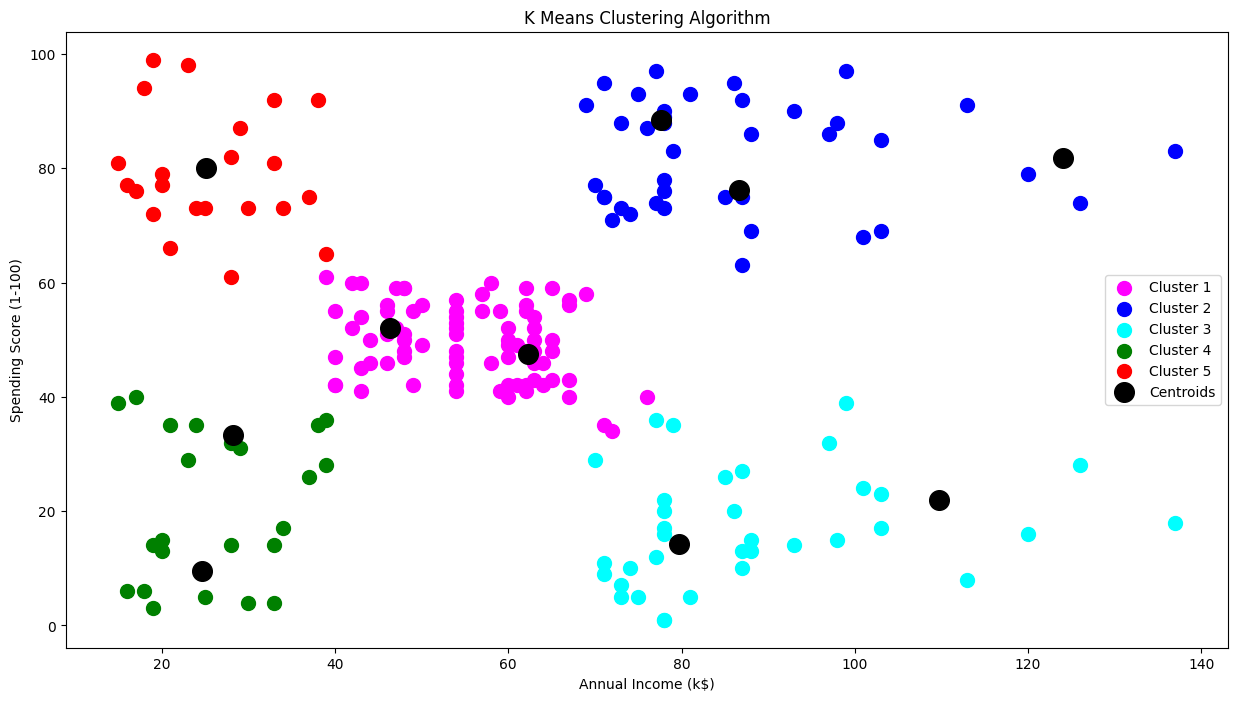

In [34]:
plt.figure(1 , figsize = (15 , 8))
plt.scatter(x[y_kemsn == 0, 0], x[y_kemsn == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(x[y_kemsn == 1, 0], x[y_kemsn == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kemsn == 2, 0], x[y_kemsn == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_kemsn == 3, 0], x[y_kemsn == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(x[y_kemsn == 4, 0], x[y_kemsn == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()